In [136]:
from dataset_generator import dataset_generator
from Model import Model
import pandas as pd
import random
import warnings
import matplotlib.pyplot as plt
from scipy.interpolate import spline
import numpy as np
import tensorflow as tf
import math
import cv2
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
#geneate data
train_set = dataset_generator(10000)
validation_set = dataset_generator(30)

In [3]:
#to numpy array
x_train = np.array(train_set[0])
y_train = np.array(train_set[1])
x_validation = np.array(validation_set[0])
y_validation = np.array(validation_set[1])

In [4]:
print(x_train.shape)
print(y_train.shape)

(10000, 600, 400, 3)
(10000, 8, 1)


In [5]:
new_y_train = y_train.reshape(10000,8)
new_y_validation  = y_validation.reshape(30,8)

Cost on validation set after epoch 1: 129777.310049
Cost on validation set after epoch 2: 919.140566
Cost on validation set after epoch 3: 769.691328
Cost on validation set after epoch 4: 616.513142
Cost on validation set after epoch 5: 444.034416
Cost on validation set after epoch 6: 263.572548
Cost on validation set after epoch 7: 171.445831
Cost on validation set after epoch 8: 132.723552
Cost on validation set after epoch 9: 112.593318
Cost on validation set after epoch 10: 98.381923


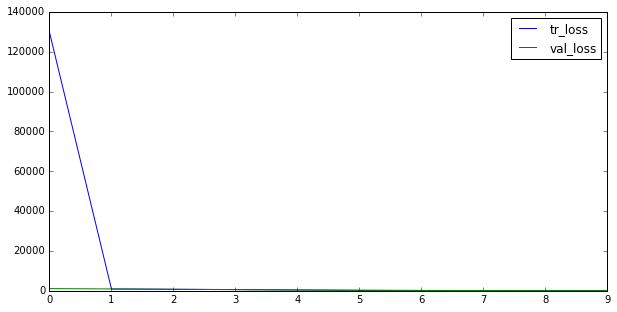

CPU times: user 10h 26min 46s, sys: 1h 43min 56s, total: 12h 10min 43s
Wall time: 5h 17min 26s


In [148]:
%%time
model = Model()
model.train(x_train,x_validation, new_y_train, new_y_validation, learning_rate = 0.001, num_epochs = 10,minibatch_size = 32)

## Prediction

In [175]:
#prediction on validation set
prediction = model.predict(x_validation)
print(prediction[:3])

[[  29.97934341   27.73621559  349.56756592  101.43600464  341.95944214
   507.40460205   11.89748287  497.46203613]
 [  22.3176918    27.36451149  359.24163818   25.52947617  368.90344238
   592.98754883   71.71212006  490.60980225]
 [  51.96494293   50.34090042  369.57226562   13.75398922  319.45748901
   530.69091797   33.6272316   530.64837646]]


In [164]:
#actual values on validation set
new_y_validation[:3]

array([[  41.12551194,   31.20736288,  353.74130865,   96.07332081,
         351.06011679,  513.49586153,   10.61192947,  503.78981678],
       [  17.87496994,   38.15304811,  355.67724183,   10.66747914,
         367.80826276,  582.33009498,   72.3511119 ,  485.02078322],
       [  54.64711093,   33.47010632,  385.85107231,   16.09908108,
         336.89567278,  553.59214895,   39.57904404,  538.68711986]])

In [198]:
# mean error on validation set
errors = [pred-actu for pred, actu in zip(prediction, new_y_validation)]
error_mean = np.mean(error_list)
print(error_mean)

8.58826860659


# Visualization (using results from "Prediction" section)

#### Initial images

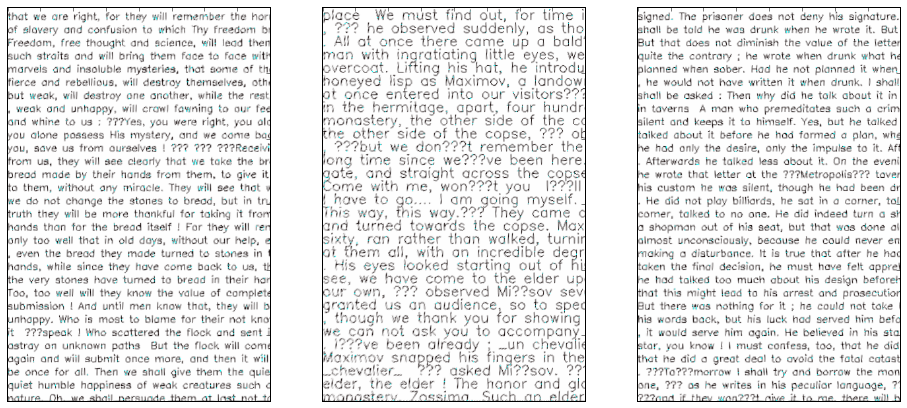

In [177]:
n_rows = 1
n_cols = 3
plt.figure(figsize=(16, 10))
for i in range(n_rows*n_cols):
    plt.subplot(n_rows, n_cols, i+1)
    pts_src = new_y_validation[i].reshape((4,2)) #actual values on val.set
    pts_dst = np.array([[0, 0], [400, 0], [400, 600],[0, 600]])
    h, status = cv2.findHomography(pts_src, pts_dst)
    vis_img = cv2.warpPerspective(x_validation[i], h, (x_validation[i].shape[1],x_validation[i].shape[0]))
    
    plt.tick_params(bottom='off', left='off', labelbottom='off', labelleft='off')
    plt.imshow(vis_img)

#### Deformed images

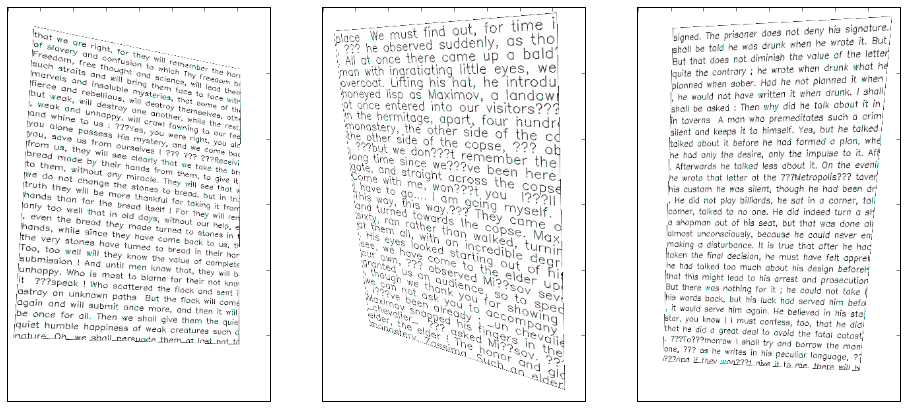

In [178]:
n_rows = 1
n_cols = 3
plt.figure(figsize=(16, 10))
for i in range(n_rows*n_cols):
    plt.subplot(n_rows, n_cols, i+1)
    plt.tick_params(bottom='off', left='off', labelbottom='off', labelleft='off')
    plt.imshow(x_validation[i]) 

#### Restored images

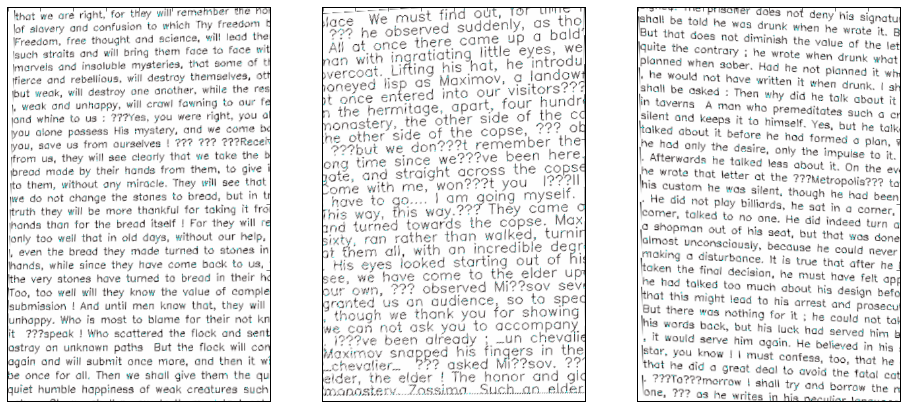

In [179]:
n_rows = 1
n_cols = 3
plt.figure(figsize=(16, 10))
for i in range(n_rows*n_cols):
    plt.subplot(n_rows, n_cols, i+1)
    pts_src = prediction[i].reshape((4,2))#predictions on val. set using CNN
    pts_dst = np.array([[0, 0], [400, 0], [400, 600],[0, 600]])
    h, status = cv2.findHomography(pts_src, pts_dst)
    vis_img = cv2.warpPerspective(x_validation[i], h, (x_validation[i].shape[1],x_validation[i].shape[0]))
    
    plt.tick_params(bottom='off', left='off', labelbottom='off', labelleft='off')
    plt.imshow(vis_img)